In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.duplicated().sum()

0

In [64]:
data['Education'] = data['Education'].apply(lambda x: 'Bellow College' if x == 1 
                                            else 'College' if x == 2 
                                            else 'Bachelor' if x == 3 
                                            else 'Master' if x == 4 
                                            else 'Doctor')

 
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].apply(lambda x: 'Low' if x == 1 
                                                                        else 'Medium' if x == 2 
                                                                        else 'High' if x == 3 
                                                                        else 'Very High')

data['JobInvolvement'] = data['JobInvolvement'].apply(lambda x: 'Low' if x == 1
                                                      else 'Medium' if x == 2 
                                                      else 'High' if x == 3 
                                                      else 'Very High')

data['JobLevel'] = data['JobLevel'].apply(lambda x: 'Junior' if x == 1
                                          else 'Mid' if x == 2 
                                          else 'Senior' if x == 3 
                                          else 'Manager' if x ==4 
                                          else 'Director')

data['JobSatisfaction'] = data['JobSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                        else 'Medium' if x == 2
                                                        else 'High' if x == 3 
                                                        else 'Very High')

data['PerformanceRating'] = data['PerformanceRating'].apply(lambda x: 'Low' if x == 1
                                                            else 'Good' if x == 2
                                                            else 'Excellent' if x == 3 
                                                            else 'Outstanding')

data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                          else 'Medium' if x == 2
                                                                          else 'High' if x == 3 
                                                                          else 'Very High')

data['WorkLifeBalance'] = data['WorkLifeBalance'].apply(lambda x: 'Bad' if x == 1
                                                        else 'Good' if x == 2
                                                        else 'Better' if x == 3 
                                                        else 'Best')

In [68]:
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis = 1)

In [85]:
num_attributes = data.select_dtypes(include=['int64'])
cat_attributes = data.select_dtypes(include=['object'])

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [87]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Bellow College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Bellow College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


### EDA

### Attrition

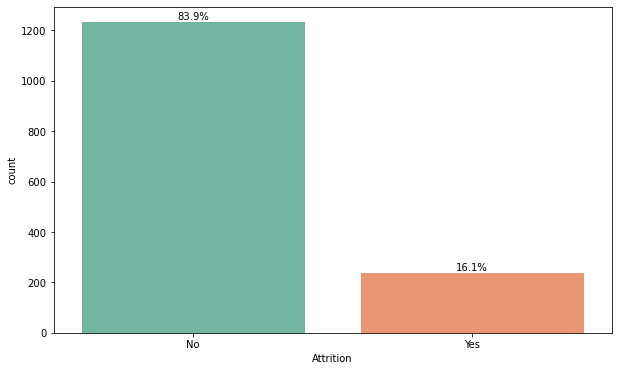

In [53]:
fig = plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'Attrition', palette='Set2', order = data['Attrition'].value_counts().index)

count = data['Attrition'].value_counts()

for i in range(len(count)):
    percentage = '{:0.1f}%'.format(count[i]/data.shape[0] * 100)
    plt.text(i,count[i] + 10,percentage, ha = 'center')

### Numeric Attributes

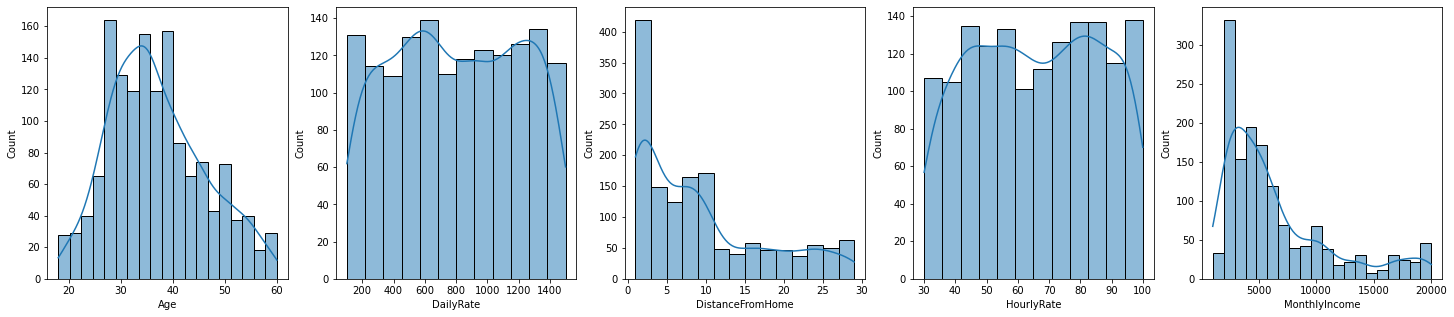

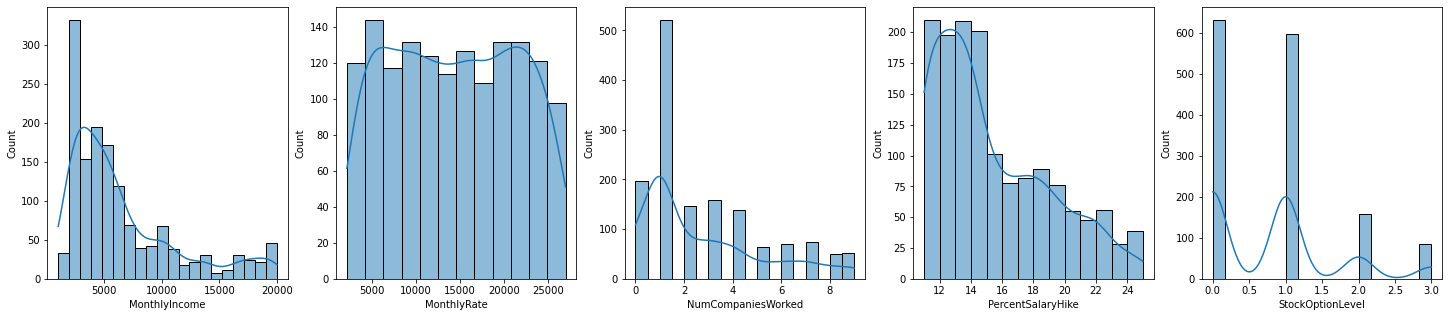

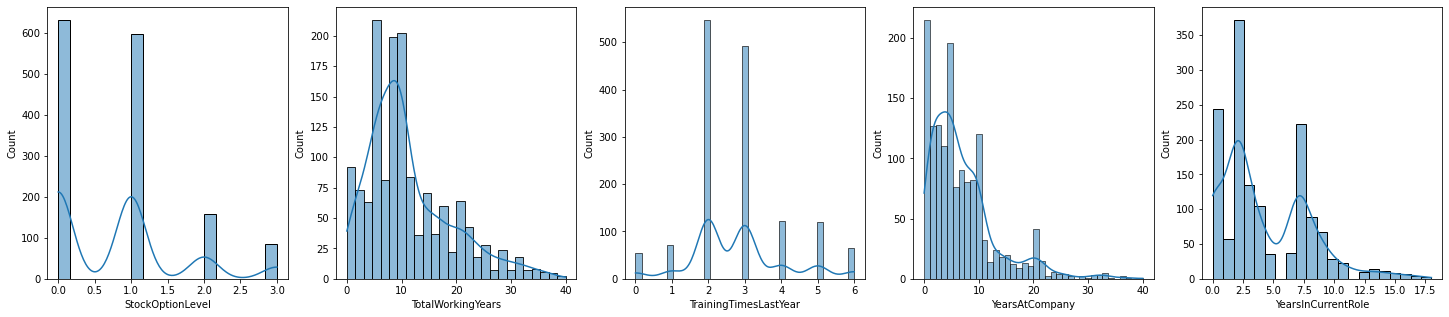

In [90]:
n_rows = 3
n_cols = 5
for i in range(n_rows):
    fig,ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (25,5))
    for j in range(n_cols):
        sns.histplot(x = data[num_attributes.columns[i*4+j]], ax = ax[j], kde = True)

### Catagorical Attributes

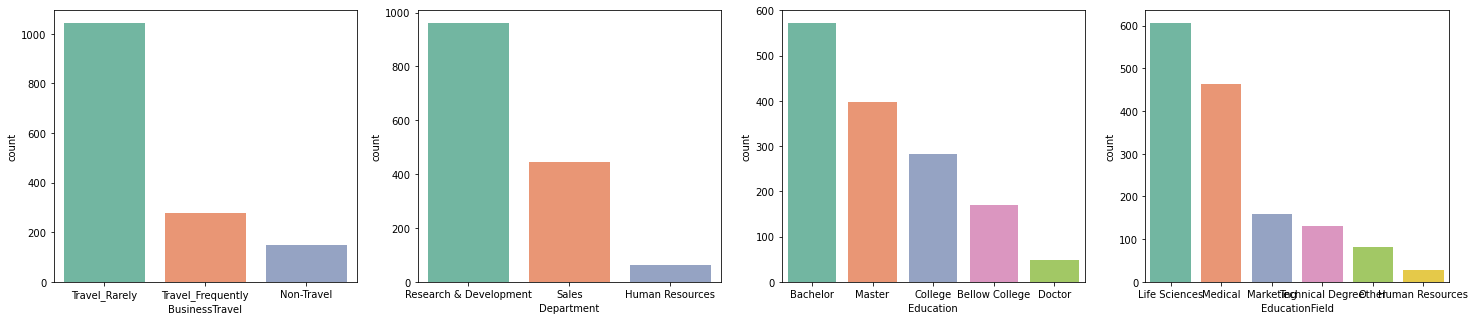

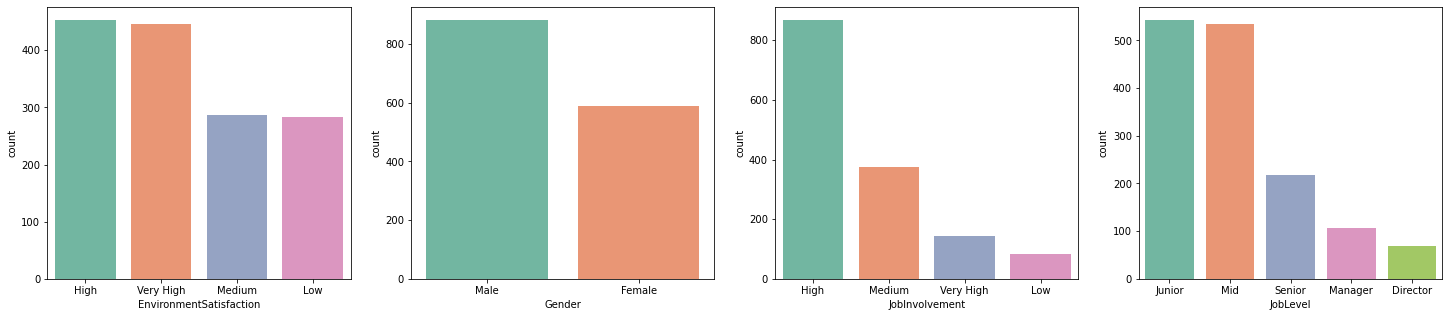

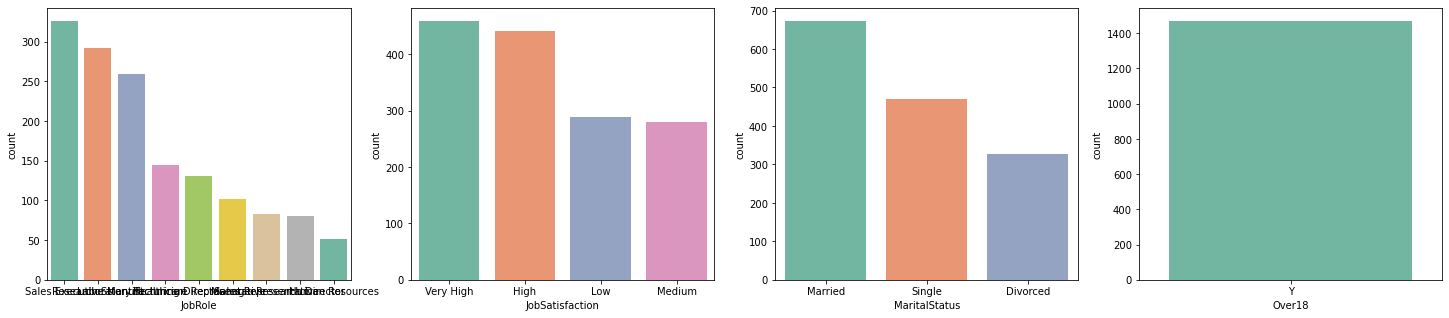

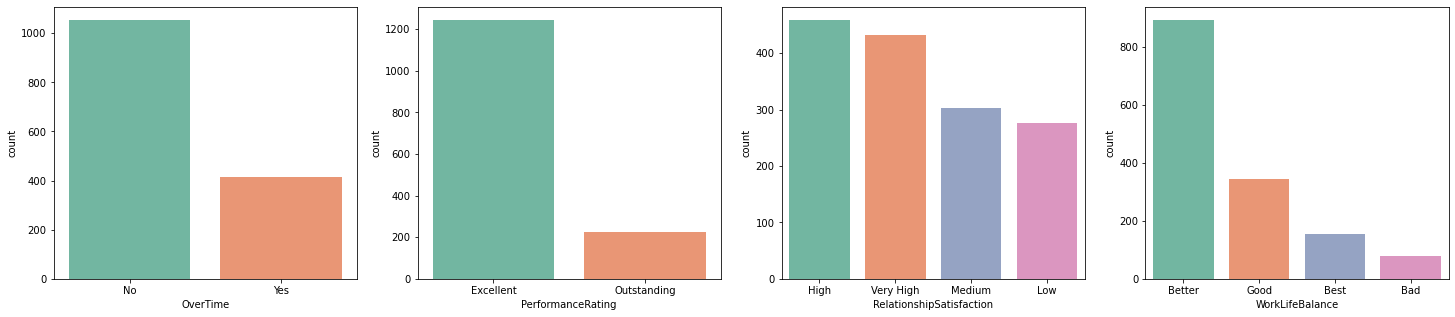

In [107]:
n_rows = 4
n_cols = 4
for i in range(n_rows):
    fig,ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (25,5))
    for j in range(n_cols):
        col_name = cat_attributes.columns[i*4+j+1]
        sns.countplot(x = data[col_name], ax = ax[j], palette='Set2', order = data[col_name].value_counts().index)

## Feature Engineering

In [108]:
label = LabelEncoder()

for column in cat_attributes.columns:
    data[column] = label.fit_transform(data[column])

In [111]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

## Modeling

### LogisticRegression

In [120]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
print(f"CLASSIFICATION REPORT:\n{pd.DataFrame(classification_report(y_test, pred, output_dict=True))}")

Accuracy Score: 84.81%

Confusion Matrix: 
 [[367   4]
 [ 63   7]]

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.853488   0.636364  0.848073    0.744926      0.819024
recall       0.989218   0.100000  0.848073    0.544609      0.848073
f1-score     0.916355   0.172840  0.848073    0.544597      0.798336
support    371.000000  70.000000  0.848073  441.000000    441.000000


### DecisionTree

In [137]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 11, 'min_samples_split': 2, 'splitter': 'random'})


DecisionTreeClassifier(max_depth=8, min_samples_leaf=11, splitter='random')

In [138]:
pred = tree_clf.predict(X_test)

In [139]:
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
print(f"CLASSIFICATION REPORT:\n{pd.DataFrame(classification_report(y_test, pred, output_dict=True))}")

Accuracy Score: 83.45%

Confusion Matrix: 
 [[350  21]
 [ 52  18]]

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870647   0.461538  0.834467    0.666093      0.805709
recall       0.943396   0.257143  0.834467    0.600270      0.834467
f1-score     0.905563   0.330275  0.834467    0.617919      0.814247
support    371.000000  70.000000  0.834467  441.000000    441.000000


### RandomForest

In [142]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf, 
    params_grid, 
    scoring="f1", 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


RandomForestClassifier(bootstrap=False, max_features='auto',
                       min_samples_split=10)

In [143]:
pred = rf_clf.predict(X_test)

In [144]:
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
print(f"CLASSIFICATION REPORT:\n{pd.DataFrame(classification_report(y_test, pred, output_dict=True))}")

Accuracy Score: 84.35%

Confusion Matrix: 
 [[361  10]
 [ 59  11]]

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.859524   0.523810  0.843537    0.691667      0.806236
recall       0.973046   0.157143  0.843537    0.565094      0.843537
f1-score     0.912769   0.241758  0.843537    0.577263      0.806259
support    371.000000  70.000000  0.843537  441.000000    441.000000
